# Slope Fields and Picard Iteration

## Slope Fields

A **slope field** is a way to visualize solutions of first-order ODEs of the form
$$y' = f(x,y).$$

In Sage, we can plot these using `desolve_rk4` with `output = "slope_field"` or by using `plot_slope_field`:
```sage
plot_slope_field(f, (x, xmin, xmax), (y, ymin, ymax))
```
Here, `f` is an expression involving variables (often, but not always, named `x` and `y`).

**Example 1**: A fish population $P(t)$ (where $P$ is in thousands and $t$ is in years) obeys the logistic model
$$\frac{dP}{dt} = .02P(30 - P),\quad P(0) = 15.$$
Use the slope field to estimate $P(10)$ and the long term population $\lim_{t\to\infty}P(t)$.

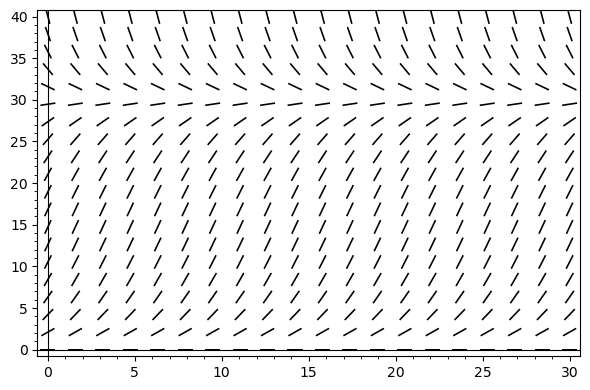

In [2]:
%display latex
var('t, P')
f = .02 * P * (30 - P)
plot_slope_field(f, (t, 0, 30), (P, 0, 40))

**Answer**: From the graph, $P(10)$ is about $27$.

Slope fields describe all possible solutions of $y' = f(x,y)$. We can get a sense of how these solutions behave by using `streamline_plot`:

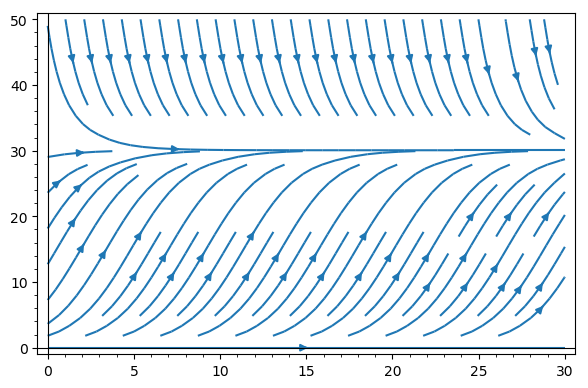

In [2]:
streamline_plot(f, (t, 0, 30), (P, 0, 50))

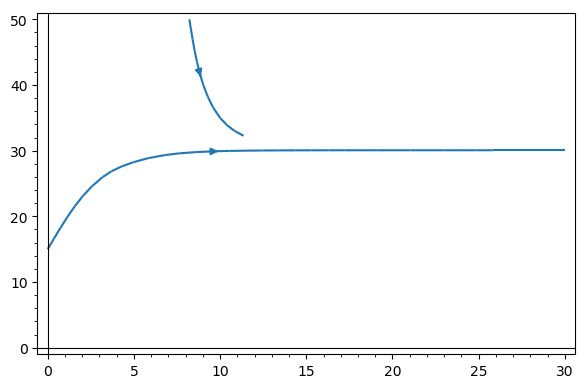

In [3]:
streamline_plot(f, (t, 0, 30), (P, 0, 50), start_points = [[0, 15], [10, 35]])

**Example 2**: Suppose the fish population from Example 1 is now being harvested at a rate of $h = 2$ per year. Then we can assume that
$$\frac{dP}{dt} = .02P(30 - P) - h,\quad P(0) = 15.$$
Using the interactive graph below, determine the following:
1. Estimate the new long term population.
2. What is the largest sustainable rate of harvesting?

In [3]:
@interact
def _(h = slider(2, 6, step_size = 0.25, label = "$h = $")):
    streamline_plot(f - h, (t, 0, 30), (P, 0, 50), start_points = [[0, 15]]).show()

Interactive function <function _ at 0x6ffe8856a9e0> with 1 widget
  h: TransformFloatSlider(value=2.0, description='$h = $', max=6.0, min=2.0, step=0.25)

**Answer**:
1. The new long term pop. is about $25$.
2. THe max. sustainable rate of harvesting is $h = 4.25$.

## Picard Iteration

We can approximate solutions to ODEs using an algebraic method known as **Picard iteration**. The idea is as follows: to solve the IVP $y' = f(x,y), y(x_{0}) = y_{0}$,
1. Make an initial guess $y = y_{0}$ (so the first guess is a constant function!).
2. Update the initial guess $y_{0}$ to get a new guess/approximation $y_{1}$, given by
$$y_{1} = y_{0} + \int_{x_{0}}^{x}f(t, y_{0})\,dt.$$
3. Update the new guess $y_{1}$ in the same manner to obtain
$$y_{2} = y_{0} + \int_{x_{0}}^{x}f(t,y_{1}(t))\,dt.$$
4. Continue in this way to obtain more and more **Picard iterates**
$$y_{n} = y_{0} + \int_{x_{0}}^{x}f(t, y_{n-1}(t))\,dt.$$

**Example 3**: Use Picard iteration to find the Picard iterates $y_{1}$ and $y_{2}$ that approximate the solution of $y' = y, y(0) = 1$. Try to do these by hand, and then verify your work with the function below.

In [4]:
def picard(f, x0, y0, n):
    """
    Computes the nth Picard iterate of the equation y' = f(x,y) 
    with initial condition y(x0) = y0.
    """
    var('t')
    yn = y0    # initial guess
    for i in range(1, n + 1):
        yn = yn.subs(x = t)    # substitute t in for x before integrating
        yn = y0 + integral(f.subs(x = t, y = yn), t, x0, x)   # sub t in for x, yn in for y and then integrate
    return yn

var('y')
f = y
x0 = 0
y0 = 1
n = 4

picard(f, x0, y0, n)   # computes y_n

1/24*x^4 + 1/6*x^3 + 1/2*x^2 + x + 1

The following plot compares the sequence of Picard iterates with the exact solution $y = e^{x}$.

In [5]:
@interact
def picardPlot(n = slider(0, 6, label = "$n = $")):
    listOfColors = list(colors)
    P = plot(exp(x), (x, -5, 5), ymin = 0, ymax = 2, color = 'blue', legend_label = '$e^x$')
    
    for i in range(0, n + 1):
        yn = picard(f, x0, y0, i)
        P += plot(yn, (x, -5, 5), ymin = 0, ymax = 2, color = listOfColors[i], legend_label = "${0}$".format(latex(yn)))
    
    P.show()

Interactive function <function picardPlot at 0x6ffe881967a0> with 1 widget
  n: TransformIntSlider(value=0, description='$n = $', max=6)

**Example 4**: Use the Picard iterate $y_{6}$ to estimate $e^{-1}$, and compare your estimate with the exact value. (If you need to convert an exact value like `exp(-1)` into a decimal use the `N()` function, e.g., `N(exp(-1))`.)

In [ ]:
# code cell for Example 4